<a href="https://colab.research.google.com/github/R4HUL-ROY/Multimodal_feature_extraction/blob/main/Text_preprocessing_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd

# Read Dataset

In [45]:
dataset=pd.read_csv("/content/drive/MyDrive/Machine Learning/ML DATASET/COVID-19 AR Clinical Correlates July202020_text.csv")
print(dataset.shape)
dataset.head()

(260, 7)


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,patient_id,Diag to img study (days),Diagnosis to Imaging time (hrs),Image Study Description,study modality,FIO2 @ time of img study,Radiologist KEY FINDINGS
1,COVID-19-AR-16434409,0,15,XR CHEST AP PORTABLE,DX,NaN,Subtle patchy bibasilar and right upper lobe a...
2,COVID-19-AR-16434381,0,18,XR CHEST AP PORTABLE,DX,NaN,Streaky opacities in bilateral mid and left lo...
3,COVID-19-AR-16434381,2,56,XR CHEST AP ONLY,DX,NaN,Lung volumes remain low but there appears to h...
4,COVID-19-AR-16406513,0,19,XR CHEST PA AND LATERAL,"CR,DX",NaN,patchy increased opacity in the lower lobes b...


In [46]:
dataset.columns=dataset.iloc[0]
dataset=dataset[1:]
dataset

,patient_id,Diag to img study (days),Diagnosis to Imaging time (hrs),Image Study Description,study modality,FIO2 @ time of img study,Radiologist KEY FINDINGS
1,COVID-19-AR-16434409,0,15,XR CHEST AP PORTABLE,DX,NaN,Subtle patchy bibasilar and right upper lobe a...
2,COVID-19-AR-16434381,0,18,XR CHEST AP PORTABLE,DX,NaN,Streaky opacities in bilateral mid and left lo...
3,COVID-19-AR-16434381,2,56,XR CHEST AP ONLY,DX,NaN,Lung volumes remain low but there appears to h...
4,COVID-19-AR-16406513,0,19,XR CHEST PA AND LATERAL,"CR,DX",NaN,patchy increased opacity in the lower lobes b...
5,COVID-19-AR-16406513,1,27,CT PE CHEST,CT,NaN,Mild dependent atelectatic changes are seen in...
...,...,...,...,...,...,...,...
255,COVID-19-AR-16445122,0,19,XR CHEST AP PORTABLE,DX,NaN,Hazy airspace changes are seen in both lung ba...
256,COVID-19-AR-16445149,5,134,XR CHEST AP PORTABLE,DX,NaN,Hypoinflated lungs with minimal bibasilar opa...
257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
dataset=dataset[['patient_id','Radiologist KEY FINDINGS']]
dataset = dataset.reset_index(drop=True)
dataset
# df.rename(columns={'Image Study Description' : 'Image_Study_Description', 'study modality': 'study_modality', 'Radiologist KEY FINDINGS': 'Radiologist_KEY_FINDINGS' }, inplace=True)
# df

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,Subtle patchy bibasilar and right upper lobe a...
1,COVID-19-AR-16434381,Streaky opacities in bilateral mid and left lo...
2,COVID-19-AR-16434381,Lung volumes remain low but there appears to h...
3,COVID-19-AR-16406513,patchy increased opacity in the lower lobes b...
4,COVID-19-AR-16406513,Mild dependent atelectatic changes are seen in...
...,...,...
254,COVID-19-AR-16445122,Hazy airspace changes are seen in both lung ba...
255,COVID-19-AR-16445149,Hypoinflated lungs with minimal bibasilar opa...
256,NaN,NaN
257,NaN,NaN


In [48]:
dataset.dropna(inplace=True)
print(dataset.shape)

(256, 2)


In [49]:
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,Subtle patchy bibasilar and right upper lobe a...
1,COVID-19-AR-16434381,Streaky opacities in bilateral mid and left lo...
2,COVID-19-AR-16434381,Lung volumes remain low but there appears to h...
3,COVID-19-AR-16406513,patchy increased opacity in the lower lobes b...
4,COVID-19-AR-16406513,Mild dependent atelectatic changes are seen in...
...,...,...
251,COVID-19-AR-16439200,Lungs are moderately inflated but there are wo...
252,COVID-19-AR-16439190,Diffusely distributed throughout the lungs are...
253,COVID-19-AR-16445122,Multiple bilateral diffuse peripheral areas of...
254,COVID-19-AR-16445122,Hazy airspace changes are seen in both lung ba...


In [50]:
dataset['Radiologist KEY FINDINGS'] = dataset.groupby(['patient_id'])['Radiologist KEY FINDINGS'].transform(lambda x : ' '.join(x))
  
# drop duplicate data
dataset = dataset.drop_duplicates()
dataset = dataset.reset_index(drop=True)
dataset.shape

(105, 2)

In [51]:
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,Subtle patchy bibasilar and right upper lobe a...
1,COVID-19-AR-16434381,Streaky opacities in bilateral mid and left lo...
2,COVID-19-AR-16406513,patchy increased opacity in the lower lobes b...
3,COVID-19-AR-16439216,No relevant findings Interval development of p...
4,COVID-19-AR-16406491,There has been development of bilateral lower ...
...,...,...
100,COVID-19-AR-16434383,"There are bibasilar airspace opacities, left w..."
101,COVID-19-AR-16439200,Hypoinflated lungs with bibasilar opacities Lu...
102,COVID-19-AR-16439190,Diffusely distributed throughout the lungs are...
103,COVID-19-AR-16445122,Multiple bilateral diffuse peripheral areas of...


# Tokenize, lemmatization and stopwords remove

In [52]:
# removing punctuations
import re
dataset['Radiologist KEY FINDINGS'] = [re.sub(r'[^\w\s]','',s) for s in dataset['Radiologist KEY FINDINGS']]
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,Subtle patchy bibasilar and right upper lobe a...
1,COVID-19-AR-16434381,Streaky opacities in bilateral mid and left lo...
2,COVID-19-AR-16406513,patchy increased opacity in the lower lobes b...
3,COVID-19-AR-16439216,No relevant findings Interval development of p...
4,COVID-19-AR-16406491,There has been development of bilateral lower ...
...,...,...
100,COVID-19-AR-16434383,There are bibasilar airspace opacities left wo...
101,COVID-19-AR-16439200,Hypoinflated lungs with bibasilar opacities Lu...
102,COVID-19-AR-16439190,Diffusely distributed throughout the lungs are...
103,COVID-19-AR-16445122,Multiple bilateral diffuse peripheral areas of...


In [53]:
# Tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [54]:
dataset['Radiologist KEY FINDINGS'] = [nltk.word_tokenize(s) for s in dataset['Radiologist KEY FINDINGS']]
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,"[Subtle, patchy, bibasilar, and, right, upper,..."
1,COVID-19-AR-16434381,"[Streaky, opacities, in, bilateral, mid, and, ..."
2,COVID-19-AR-16406513,"[patchy, increased, opacity, in, the, lower, l..."
3,COVID-19-AR-16439216,"[No, relevant, findings, Interval, development..."
4,COVID-19-AR-16406491,"[There, has, been, development, of, bilateral,..."
...,...,...
100,COVID-19-AR-16434383,"[There, are, bibasilar, airspace, opacities, l..."
101,COVID-19-AR-16439200,"[Hypoinflated, lungs, with, bibasilar, opaciti..."
102,COVID-19-AR-16439190,"[Diffusely, distributed, throughout, the, lung..."
103,COVID-19-AR-16445122,"[Multiple, bilateral, diffuse, peripheral, are..."


In [55]:
#removing stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'bo

In [56]:
# removing stopwords
def remove_stopword(word_list):
    new_word_list = []
    for word in word_list:
        if word.lower() not in stop_words:
            new_word_list.append(word)
    return new_word_list

dataset['Radiologist KEY FINDINGS'] = [remove_stopword(this_list) for this_list in dataset['Radiologist KEY FINDINGS']]

In [57]:
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,"[Subtle, patchy, bibasilar, right, upper, lobe..."
1,COVID-19-AR-16434381,"[Streaky, opacities, bilateral, mid, left, low..."
2,COVID-19-AR-16406513,"[patchy, increased, opacity, lower, lobes, bil..."
3,COVID-19-AR-16439216,"[relevant, findings, Interval, development, pa..."
4,COVID-19-AR-16406491,"[development, bilateral, lower, lobe, airspace..."
...,...,...
100,COVID-19-AR-16434383,"[bibasilar, airspace, opacities, left, worse, ..."
101,COVID-19-AR-16439200,"[Hypoinflated, lungs, bibasilar, opacities, Lu..."
102,COVID-19-AR-16439190,"[Diffusely, distributed, throughout, lungs, ar..."
103,COVID-19-AR-16445122,"[Multiple, bilateral, diffuse, peripheral, are..."


In [58]:
# Lemmatization
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer  = WordNetLemmatizer()
lemmatized_dataset = []

for this_str in dataset['Radiologist KEY FINDINGS']:
    lemmatized_str = []
    for word in this_str:
        lemmatized_str.append(lemmatizer.lemmatize(word))
    lemmatized_dataset.append(lemmatized_str)

dataset['Radiologist KEY FINDINGS'] = lemmatized_dataset

In [59]:
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,"[Subtle, patchy, bibasilar, right, upper, lobe..."
1,COVID-19-AR-16434381,"[Streaky, opacity, bilateral, mid, left, lower..."
2,COVID-19-AR-16406513,"[patchy, increased, opacity, lower, lobe, bila..."
3,COVID-19-AR-16439216,"[relevant, finding, Interval, development, pat..."
4,COVID-19-AR-16406491,"[development, bilateral, lower, lobe, airspace..."
...,...,...
100,COVID-19-AR-16434383,"[bibasilar, airspace, opacity, left, worse, ri..."
101,COVID-19-AR-16439200,"[Hypoinflated, lung, bibasilar, opacity, Lungs..."
102,COVID-19-AR-16439190,"[Diffusely, distributed, throughout, lung, are..."
103,COVID-19-AR-16445122,"[Multiple, bilateral, diffuse, peripheral, are..."


# TFIDF vectorization

In [60]:
dataset["Radiologist KEY FINDINGS"]= dataset["Radiologist KEY FINDINGS"].str.join(" ")
dataset

,patient_id,Radiologist KEY FINDINGS
0,COVID-19-AR-16434409,Subtle patchy bibasilar right upper lobe airsp...
1,COVID-19-AR-16434381,Streaky opacity bilateral mid left lower lung ...
2,COVID-19-AR-16406513,patchy increased opacity lower lobe bilaterall...
3,COVID-19-AR-16439216,relevant finding Interval development patchy a...
4,COVID-19-AR-16406491,development bilateral lower lobe airspace dise...
...,...,...
100,COVID-19-AR-16434383,bibasilar airspace opacity left worse right In...
101,COVID-19-AR-16439200,Hypoinflated lung bibasilar opacity Lungs mode...
102,COVID-19-AR-16439190,Diffusely distributed throughout lung area con...
103,COVID-19-AR-16445122,Multiple bilateral diffuse peripheral area nod...


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()
# vectors = vectorizer.fit_transform(dataset['Radiologist KEY FINDINGS'])
vectors = vectorizer.fit_transform(list(dataset['Radiologist KEY FINDINGS']))
feature_names = vectorizer.get_feature_names()
matrix = vectors.todense()

tfidf_df = pd.DataFrame(matrix, columns = feature_names)

tfidf_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,06,07,09,17,18,21,22,23,acute,additional,aeration,air,airspace,along,also,andor,angle,anterior,ap,apex,appear,appearance,appears,approximately,ards,area,artery,aspect,atelectasis,atelectatic,bandlike,basal,base,basilar,bibasilar,bifurcation,bilateral,bilaterally,blunting,border,...,somewhat,space,spared,sparing,stable,still,streaky,study,subcutaneous,subpleural,subsegmental,subtle,suggestive,sulcus,superimposed,surrounding,suspicious,symmetric,thickening,throughout,trace,transverse,unchanged,underinflated,upper,vascular,versus,view,volume,wall,wedge,wedgeshaped,well,wellaerated,within,without,worse,worsened,worsening,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.252626,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.395529,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.465395,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.430648,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.268214,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.139472,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.256151,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.256151,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.048172,0.0,0.0,0.0,0.127117,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.088744,0.105382,0.0,0.0,0.000000,0.0,0.000000,0.0,0.198303,0.090645,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.134113,0.155848,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.082118,0.0,0.0,0.155848,0.000000,0.0,0.0,0.0,0.0,0.0,0.083648,0.0,0.000000,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.290935,0.0,0.0,0.000000,0.000000,0.0,0.0,0.186392,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.403469,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.164288,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.225433,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.268841,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.105229,0.0,0.184450,0.000000,0.0,0.0,...,0.313586,0.0,0.0,0.0,0.156793,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.396933,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.169379,0.0,0.118951,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.194579,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,

# Checking for Patients are in same sequence or not

In [62]:
patient_1 = dataset['patient_id']  #Text Dataframe
patient_1 = list(patient_1)
print(patient_1)

['COVID-19-AR-16434409', 'COVID-19-AR-16434381', 'COVID-19-AR-16406513', 'COVID-19-AR-16439216', 'COVID-19-AR-16406491', 'COVID-19-AR-16406496', 'COVID-19-AR-16424082', 'COVID-19-AR-16406504', 'COVID-19-AR-16434350', 'COVID-19-AR-16406502', 'COVID-19-AR-16406494', 'COVID-19-AR-16424105', 'COVID-19-AR-16439195', 'COVID-19-AR-16445144', 'COVID-19-AR-16424071', 'COVID-19-AR-16439186', 'COVID-19-AR-16406521', 'COVID-19-AR-16406505', 'COVID-19-AR-16406526', 'COVID-19-AR-16434452', 'COVID-19-AR-16424075', 'COVID-19-AR-16424081', 'COVID-19-AR-16434347', 'COVID-19-AR-16406488', 'COVID-19-AR-16445151', 'COVID-19-AR-16424115', 'COVID-19-AR-16406490', 'COVID-19-AR-16406545', 'COVID-19-AR-16406561', 'COVID-19-AR-16424116', 'COVID-19-AR-16434366', 'COVID-19-AR-16434369', 'COVID-19-AR-16406489', 'COVID-19-AR-16424093', 'COVID-19-AR-16434358', 'COVID-19-AR-16406498', 'COVID-19-AR-16407173', 'COVID-19-AR-16434380', 'COVID-19-AR-16406503', 'COVID-19-AR-16424083', 'COVID-19-AR-16406542', 'COVID-19-AR-16

In [63]:
# df contains the pathology dataframe
filepath =  r"/content/drive/MyDrive/Machine Learning/ML DATASET/COVID-19 AR Clinical Correlates July202020 (csv).csv"
df = pd.read_csv(filepath, header = 1)
print(df.tail(3))

patient_2 = list(df['PATIENT_ID'][:-2])
print(patient_2)

               PATIENT_ID   AGE  SEX  ... ICU Admit  # ICU admits  MORTALITY
104  COVID-19-AR-16445149  41.0    F  ...         N           0.0          N
105                   NaN   NaN  NaN  ...       NaN           NaN        NaN
106                   NaN   NaN  NaN  ...       NaN           NaN        NaN

[3 rows x 32 columns]
['COVID-19-AR-16434409', 'COVID-19-AR-16434381', 'COVID-19-AR-16406513', 'COVID-19-AR-16439216', 'COVID-19-AR-16406491', 'COVID-19-AR-16406496', 'COVID-19-AR-16424082', 'COVID-19-AR-16406504', 'COVID-19-AR-16434350', 'COVID-19-AR-16406502', 'COVID-19-AR-16406494', 'COVID-19-AR-16424105', 'COVID-19-AR-16439195', 'COVID-19-AR-16445144', 'COVID-19-AR-16424071', 'COVID-19-AR-16439186', 'COVID-19-AR-16406521', 'COVID-19-AR-16406505', 'COVID-19-AR-16406526', 'COVID-19-AR-16434452', 'COVID-19-AR-16424075', 'COVID-19-AR-16424081', 'COVID-19-AR-16434347', 'COVID-19-AR-16406488', 'COVID-19-AR-16445151', 'COVID-19-AR-16424115', 'COVID-19-AR-16406490', 'COVID-19-AR-1640654

In [64]:
miss_match = 0
for idx, name in enumerate(patient_1):
    if name != patient_2[idx]:
        miss_match += 1
print(miss_match) 
# as miss_match is 0, we can say in both dataframe text_data and the pathology data 
# the patients_ID are in same Sequence  

0


# Adding Mortality (Label) into tfidf dataset

In [65]:
mortality_truth = list(df['MORTALITY'])[:-2]

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
mortality_truth = le.fit_transform(mortality_truth)

tfidf_df['MORTALITY'] = mortality_truth

In [66]:
X = tfidf_df.iloc[:,:-1]
y = tfidf_df['MORTALITY']

print(X.shape)
print(y.shape)

(105, 310)
(105,)


# Train_test split

In [78]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)
print(y_test.value_counts())
print(y_train.value_counts())
print(f"X_train shape {X_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {X_test.shape}")
print(f"x_train shape {y_test.shape}")

0    19
1     2
Name: MORTALITY, dtype: int64
0    76
1     8
Name: MORTALITY, dtype: int64
X_train shape (84, 310)
y_train shape (84,)
X_test shape (21, 310)
x_train shape (21,)


# Oversampling using SMOTE

0    19
1     2
Name: MORTALITY, dtype: int64
0    76
1     8
Name: MORTALITY, dtype: int64



0    19
1     2
Name: MORTALITY, dtype: int64
0    76
1    76
Name: MORTALITY, dtype: int64


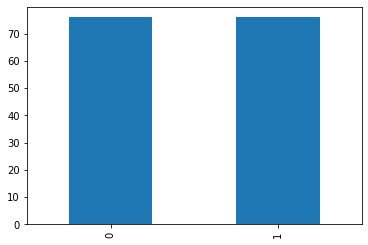

In [79]:
# Before Oversampling
print(y_test.value_counts())
print(y_train.value_counts())

print("\n\n")

from imblearn.over_sampling import SMOTE, SVMSMOTE, SMOTEN
sm = SMOTE(random_state = 42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# After Oversampling
print(y_test.value_counts())
print(y_train.value_counts())
y_train.value_counts().plot.bar()

In [38]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

# Applying PCA

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(152, 69)
(21, 69)


# Random Forest Classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
RF_clf =RandomForestClassifier(n_estimators=100)
RF_clf.fit(X_train,y_train)
y_pred=RF_clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.9047619047619048
[[19  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# RUSBoostClassifier

In [82]:
from imblearn.ensemble import RUSBoostClassifier
clf = RUSBoostClassifier(random_state=42)
clf.fit(X_train, y_train)  
y_pred = clf.predict(X_test) 

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.9047619047619048
[[19  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# BalancedRandomForestClassifier

In [83]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(max_depth = 100)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.9047619047619048
[[19  0]
 [ 2  0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN CLassifier Model

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.42857142857142855
Accuracy: 0.47619047619047616
Accuracy: 0.38095238095238093
Accuracy: 0.38095238095238093
Accuracy: 0.3333333333333333
Accuracy: 0.3333333333333333
Accuracy: 0.23809523809523808
Accuracy: 0.23809523809523808
Accuracy: 0.23809523809523808
Accuracy: 0.23809523809523808
Accuracy: 0.23809523809523808
Accuracy: 0.23809523809523808
Accuracy: 0.19047619047619047
Accuracy: 0.19047619047619047
Accuracy: 0.19047619047619047
Accuracy: 0.19047619047619047
Accuracy: 0.14285714285714285
Accuracy: 0.14285714285714285
Accuracy: 0.14285714285714285


In [85]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy: 0.38095238095238093
[[ 6 13]
 [ 0  2]]
              precision    recall  f1-score   support

           0       1.00      0.32      0.48        19
           1       0.13      1.00      0.24         2

    accuracy                           0.38        21
   macro avg       0.57      0.66      0.36        21
weighted avg       0.92      0.38      0.46        21

